In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
# load data set 
car_data =pd.read_csv("car data.csv")
car_data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [27]:
#check info of data set data type of each column  and missing values
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [28]:
#discribe the data set mean ,median ,std ,min ,mac ,count
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [29]:
# delete car_name column in data set
car_data.drop('Car_Name', axis=1, inplace=True)


In [30]:
""" In this code we calculate the age of the car doing substraction of
 current year from the year of the car and replace the column year with car_age
"""
car_data['Car_Age'] = 2025 - car_data['Year']
car_data.drop('Year', axis=1, inplace=True)


In [31]:
# here we convert the categorical data into numerical data using get_dummies
car_data = pd.get_dummies(car_data, drop_first=True)


<Axes: >

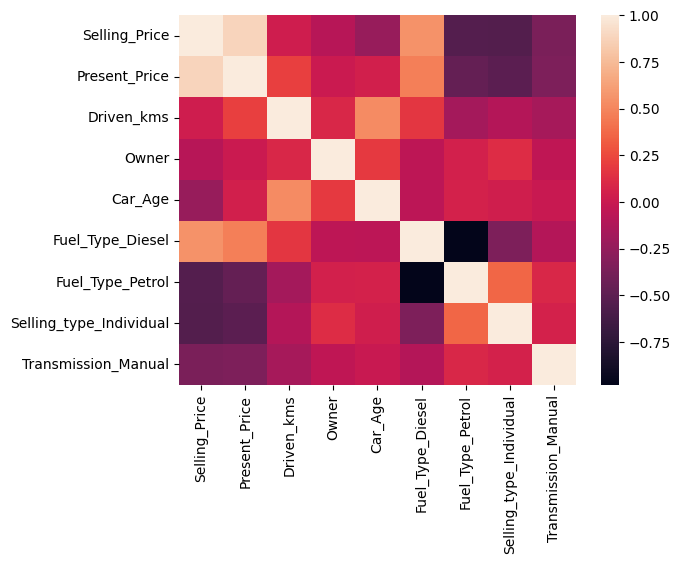

In [32]:
#here we check the correlation between the columns in the data set
sns.heatmap(car_data.corr(numeric_only=True))

In [33]:
# split the data into features and target variable
X = car_data.drop('Selling_Price', axis=1)
y = car_data['Selling_Price']


In [34]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
# fit a linear regression model to the training data
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [36]:
# make predictions on the test set and evaluate the model
# R squared check the how well the model predict the target variable
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.8755363313818749
MSE: 3.5440034651103565


The R-squared value of 0.87 indicates that our linear regression model explains 87% of the variance in the target variable, which suggests a good fit and reliable predictive performance.

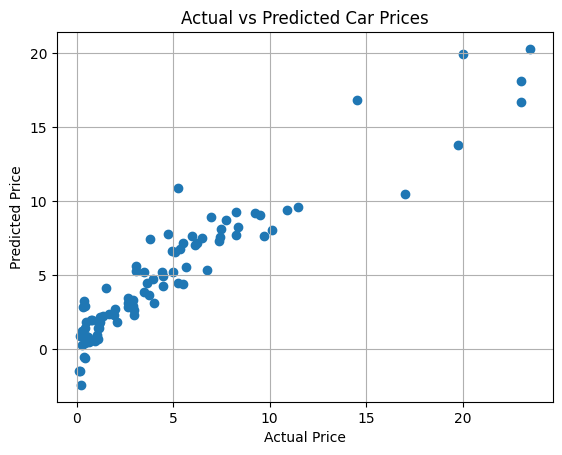

In [37]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()


The scatter plot displays the actual values on the x-axis and the predicted values on the y-axis. Each blue dot represents a data point, comparing the model's prediction to the true value. Ideally, if all predictions were perfect, all the blue dots would lie exactly on the red dashed line (y = x). The closer the dots are to this line, the more accurate the model’s predictions are.

In [38]:
"""  intercept is the value where the regression line crosses the y-axis. 
 It represents the predicted value of the target variable (y) when all input features (x₁, x₂, ..., xₙ) are zero.
"""
print("Intercept:", model.intercept_)

Intercept: 6.3140973929124655


In [39]:
""" a coefficient (also called a weight) represents the effect of one unit change in a feature (independent variable)
 on the predicted outcome (dependent variable), assuming all other features remain constant.
"""
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Present_Price,0.416893
Driven_kms,-0.000004
Owner,-1.031404
Car_Age,-0.354860
Fuel_Type_Diesel,2.713944
Fuel_Type_Petrol,0.718232
Selling_type_Individual,-1.153517
Transmission_Manual,-1.439441


84%  percentage chance that our model predict correct price

y =  (m1x1+m2x2......) +b  #where y is selling price and  x is value input value like car_age , Present_price and x is There coefficient 

In [ ]:
# Coefficients and intercept from your model
intercept = 6.486926951572739
coefficients = {
    'Present_Price': 0.42906981106281666,
    'Driven_kms': -6.1810902562520035e-06,
    'Owner': -0.90501798373978802,
    'Car_Age': -0.3529250559191818,
    'Fuel_Type_Diesel': 2.534904363617138,
    'Fuel_Type_Petrol': 0.7391545922568059,
    'Selling_type_Individual': -1.11916423595908052,
    'Transmission_Manual': -1.6400736911460128
}

# Get user input
Present_Price = float(input("Enter Present Price of car (in lakhs): "))
Driven_kms = int(input("Enter kilometers driven: "))
Owner = int(input("Enter number of previous owners (0/1/2): "))
Car_Age = int(input("Enter age of car (in years): "))

# Fuel type input
fuel_type = input("Enter Fuel Type (Diesel/Petrol): ").strip().lower()
Fuel_Type_Diesel = 1 if fuel_type == 'diesel' else 0
Fuel_Type_Petrol = 1 if fuel_type == 'petrol' else 0

# Selling type input
selling_type = input("Is the car being sold by an Individual? (yes/no): ").strip().lower()
Selling_type_Individual = 1 if selling_type == 'yes' else 0

# Transmission type input
transmission = input("Is the transmission Manual? (yes/no): ").strip().lower()
Transmission_Manual = 1 if transmission == 'yes' else 0

# Apply regression formula
predicted_price = (
    coefficients['Present_Price'] * Present_Price +
    coefficients['Driven_kms'] * Driven_kms +
    coefficients['Owner'] * Owner +
    coefficients['Car_Age'] * Car_Age +
    coefficients['Fuel_Type_Diesel'] * Fuel_Type_Diesel +
    coefficients['Fuel_Type_Petrol'] * Fuel_Type_Petrol +
    coefficients['Selling_type_Individual'] * Selling_type_Individual +
    coefficients['Transmission_Manual'] * Transmission_Manual +
    intercept
)

print(f"\n✅ Predicted Selling Price: ₹{predicted_price:.2f} lakhs")
